# Stage 2

The gravitational force between two masses is given by:

$$
\vec{F} = G \frac{m_1 m_2}{r^2} \hat{r}
$$

where  
- $F$ is the gravitational force,  
- $G$ is the gravitational constant,  
- $m_1$ and $m_2$ are the masses,  
- $r$ is the distance between the centers of the masses.

Here, $\hat{r}$ is a unit vector pointing from one mass to the other, indicating the direction of the force. It has a magnitude of 1 and specifies only the direction in space.

The force components in the $x$ and $y$ directions are:

$$
F_x = G \frac{m_1 m_2}{r^2} \frac{(x_2 - x_1)}{r}
$$

$$
F_y = G \frac{m_1 m_2}{r^2} \frac{(y_2 - y_1)}{r}
$$

where $r = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$.



The acceleration of the planet is given by:

$$
\vec{a} = \frac{\vec{F}}{m}
$$

The velocity and position are updated as:

$$
\vec{v} \leftarrow \vec{v} + \vec{a} \cdot \Delta t
$$

$$
\vec{r} \leftarrow \vec{r} + \vec{v} \cdot \Delta t
$$

where  
- $a$ is acceleration,  
- $F$ is force,  
- $m$ is mass,  
- $\vec{v}$ is velocity,  
- $\vec{r}$ is position,  
- $\Delta t$ is the time step.


To express the acceleration $\vec{a}_2$ of mass $m_2$ in terms of the force equation, we use Newton's second law:

$$
\vec{a}_2 = \frac{\vec{F}}{m_2}
$$

Substituting the gravitational force equation:

$$
\vec{a}_2 = \frac{G m_1}{r^2} \hat{r}
$$

where  
- $G$ is the gravitational constant,  
- $m_1$ is the mass exerting the force,  
- $r$ is the distance between the masses,  
- $\hat{r}$ is the unit vector pointing from $m_2$ to $m_1$.

The analytical form of the velocity can be obtained by integrating the acceleration with respect to time. If the acceleration $\vec{a}$ is constant, the velocity is:

$$
\vec{v}(t) = \vec{v}_0 + \vec{a} \cdot t
$$

However, for gravitational acceleration, which depends on position (and thus on time), the acceleration is:

$$
\vec{a}(t) = \frac{G m_1}{r(t)^2} \hat{r}(t)
$$

The velocity is then given by integrating the acceleration:

$$
\vec{v}(t) = \vec{v}_0 + \int_0^t \vec{a}(t') \, dt'
$$

where  
- $\vec{v}_0$ is the initial velocity,  
- $\vec{a}(t')$ is the time-dependent acceleration.  

For general two-body motion, this integral does not have a simple closed form, but for special cases (such as radial motion or circular orbits), analytical solutions can be derived.


The position as a function of time can be found by integrating the velocity:

$$
\vec{r}(t) = \vec{r}_0 + \int_0^t \vec{v}(t') \, dt'
$$

Substituting the expression for velocity (which itself is an integral of acceleration):

$$
\vec{r}(t) = \vec{r}_0 + \int_0^t \left[ \vec{v}_0 + \int_0^{t'} \vec{a}(t'') \, dt'' \right] dt'
$$

Expanding this, we get:

$$
\vec{r}(t) = \vec{r}_0 + \vec{v}_0 t + \int_0^t \left( \int_0^{t'} \vec{a}(t'') \, dt'' \right) dt'
$$

This double integral accounts for the time-dependent acceleration due to gravity. For constant acceleration, this reduces to the familiar kinematic equation:

$$
\vec{r}(t) = \vec{r}_0 + \vec{v}_0 t + \frac{1}{2} \vec{a} t^2
$$

But for gravitational acceleration, the nested integral must generally be evaluated numerically.


Below is a Python function that defines the equations of motion for two bodies under 
gravity, suitable for use with `scipy.integrate.odeint` or `solve_ivp`. 
The function returns the derivatives of position and velocity, as required by these solvers.

```python
def two_body_equations(t, y, G, m1, m2):
    # y = [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = y

    # Compute distance components and magnitude
    dx = x2 - x1
    dy = y2 - y1
    r = (dx**2 + dy**2)**0.5

    # Gravitational force magnitude
    F = G * m1 * m2 / r**2

    # Force components (unit vector)
    Fx = F * dx / r
    Fy = F * dy / r

    # Accelerations
    ax1 = Fx / m1
    ay1 = Fy / m1
    ax2 = -Fx / m2
    ay2 = -Fy / m2

    # Return derivatives: [dx1/dt, dy1/dt, dvx1/dt, dvy1/dt, dx2/dt, dy2/dt, dvx2/dt, dvy2/dt]
    return [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]
```

This function can be passed to `solve_ivp` or `odeint` to numerically 
integrate the positions and velocities of the two bodies over time.


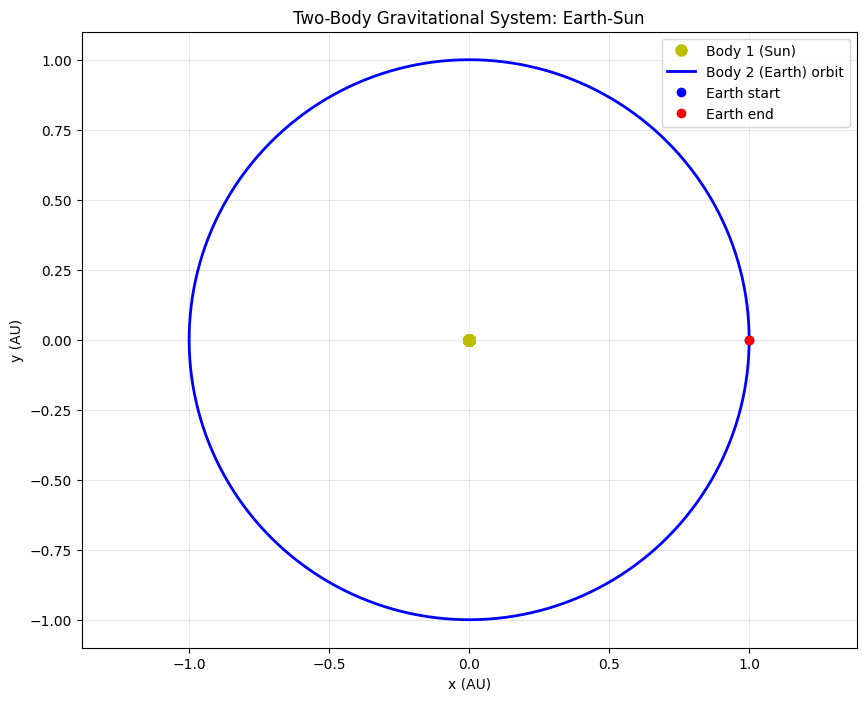

Integration successful: True
Number of function evaluations: 632
Final time: 365.2 days
Earth's final position: (1.000000, 0.000736) AU
Earth's orbital period: 365.2 days
Initial energy: -2.649712e+33 J
Final energy: -2.649712e+33 J
Energy conservation error: 0.000001%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the two_body_equations function
def two_body_equations(t, y, G, m1, m2):
    # y = [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = y

    # Compute distance components and magnitude
    dx = x2 - x1
    dy = y2 - y1
    r = (dx**2 + dy**2)**0.5

    # Gravitational force magnitude
    F = G * m1 * m2 / r**2

    # Force components (unit vector)
    Fx = F * dx / r
    Fy = F * dy / r

    # Accelerations
    ax1 = Fx / m1
    ay1 = Fy / m1
    ax2 = -Fx / m2
    ay2 = -Fy / m2

    # Return derivatives: [dx1/dt, dy1/dt, dvx1/dt, dvy1/dt, dx2/dt, dy2/dt, dvx2/dt, dvy2/dt]
    return [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]

# Physical parameters
G = 6.67430e-11  # Gravitational constant (m³/kg/s²)
m1 = 1.989e30    # Mass of body 1 (kg) - approximately Sun's mass
m2 = 5.972e24    # Mass of body 2 (kg) - approximately Earth's mass

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
# Body 1 (Sun) at origin, initially at rest
# Body 2 (Earth) at 1 AU distance with orbital velocity
AU = 1.496e11  # Astronomical unit (m)
v_orbital = np.sqrt(G * m1 / AU)  # Circular orbital velocity

initial_conditions = [
    0, 0, 0, 0,           # Body 1: position (0,0), velocity (0,0)
    AU, 0, 0, v_orbital   # Body 2: position (AU,0), velocity (0,v_orbital)
]

# Time span
t_span = (0, 365.25 * 24 * 3600)  # One year in seconds
t_eval = np.linspace(0, 365.25 * 24 * 3600, 1000)  # 1000 points over one year

# Solve the differential equation using solve_ivp
solution = solve_ivp(
    two_body_equations,
    t_span,
    initial_conditions,
    t_eval=t_eval,
    args=(G, m1, m2),
    method='RK45',
    rtol=1e-8,
    atol=1e-10
)

# Extract results
x1, y1, vx1, vy1, x2, y2, vx2, vy2 = solution.y

# Plot the orbits
plt.figure(figsize=(10, 8))
plt.plot(x1/AU, y1/AU, 'yo', markersize=8, label='Body 1 (Sun)')
plt.plot(x2/AU, y2/AU, 'b-', linewidth=2, label='Body 2 (Earth) orbit')
plt.plot(x2[0]/AU, y2[0]/AU, 'bo', markersize=6, label='Earth start')
plt.plot(x2[-1]/AU, y2[-1]/AU, 'ro', markersize=6, label='Earth end')

plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Two-Body Gravitational System: Earth-Sun')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Print some diagnostics
print(f"Integration successful: {solution.success}")
print(f"Number of function evaluations: {solution.nfev}")
print(f"Final time: {solution.t[-1]/(24*3600):.1f} days")
print(f"Earth's final position: ({x2[-1]/AU:.6f}, {y2[-1]/AU:.6f}) AU")
print(f"Earth's orbital period: {t_eval[-1]/(24*3600):.1f} days")

# Check energy conservation (optional diagnostic)
def total_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, G, m1, m2):
    # Kinetic energy
    KE = 0.5 * m1 * (vx1**2 + vy1**2) + 0.5 * m2 * (vx2**2 + vy2**2)
    
    # Potential energy
    r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    PE = -G * m1 * m2 / r
    
    return KE + PE

initial_energy = total_energy(x1[0], y1[0], vx1[0], vy1[0], x2[0], y2[0], vx2[0], vy2[0], G, m1, m2)
final_energy = total_energy(x1[-1], y1[-1], vx1[-1], vy1[-1], x2[-1], y2[-1], vx2[-1], vy2[-1], G, m1, m2)

print(f"Initial energy: {initial_energy:.6e} J")
print(f"Final energy: {final_energy:.6e} J")
print(f"Energy conservation error: {abs(final_energy - initial_energy)/abs(initial_energy)*100:.6f}%")

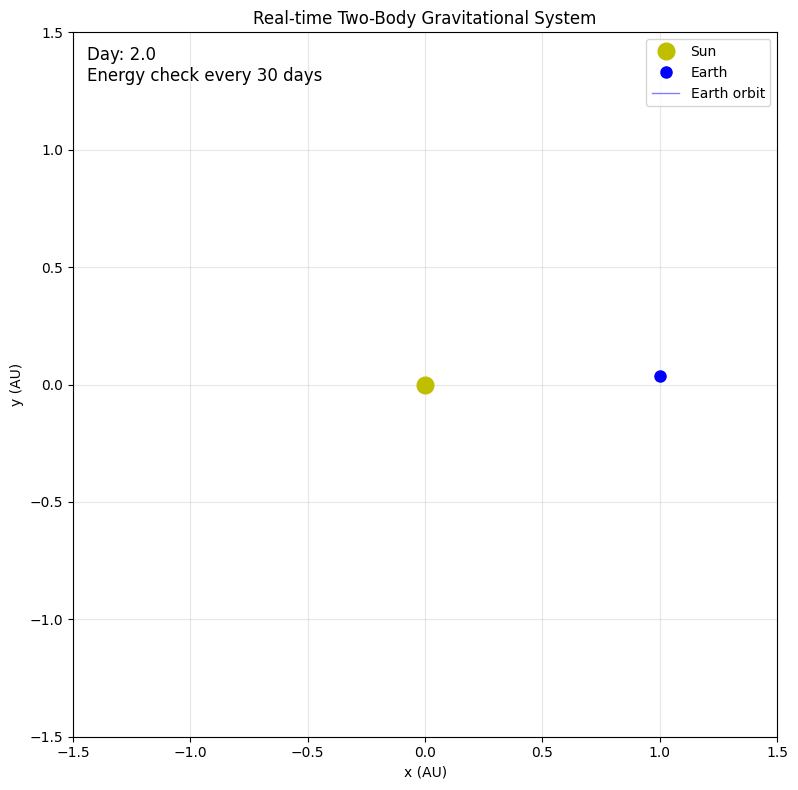

Animation complete!
Simulated 365 days
Final Earth position: (0.999408, 0.034402) AU


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

# Define the two_body_equations function
def two_body_equations(t, y, G, m1, m2):
    # y = [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = y

    # Compute distance components and magnitude
    dx = x2 - x1
    dy = y2 - y1
    r = (dx**2 + dy**2)**0.5

    # Gravitational force magnitude
    F = G * m1 * m2 / r**2

    # Force components (unit vector)
    Fx = F * dx / r
    Fy = F * dy / r

    # Accelerations
    ax1 = Fx / m1
    ay1 = Fy / m1
    ax2 = -Fx / m2
    ay2 = -Fy / m2

    # Return derivatives: [dx1/dt, dy1/dt, dvx1/dt, dvy1/dt, dx2/dt, dy2/dt, dvx2/dt, dvy2/dt]
    return [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]

# Physical parameters
G = 6.67430e-11  # Gravitational constant (m³/kg/s²)
m1 = 1.989e30    # Mass of body 1 (kg) - approximately Sun's mass
m2 = 5.972e24    # Mass of body 2 (kg) - approximately Earth's mass

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
AU = 1.496e11  # Astronomical unit (m)
v_orbital = np.sqrt(G * m1 / AU)  # Circular orbital velocity

# Starting state
current_state = np.array([
    0, 0, 0, 0,           # Body 1: position (0,0), velocity (0,0)
    AU, 0, 0, v_orbital   # Body 2: position (AU,0), velocity (0,v_orbital)
])

# Animation parameters
time_step = 24 * 3600  # 1 day in seconds
total_days = 365       # Simulate for 1 year
current_time = 0

# Storage for animation
positions_history = []
times_history = []

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')
ax.set_title('Real-time Two-Body Gravitational System')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

# Create plot elements
sun_point, = ax.plot([], [], 'yo', markersize=12, label='Sun')
earth_point, = ax.plot([], [], 'bo', markersize=8, label='Earth')
orbit_trail, = ax.plot([], [], 'b-', alpha=0.5, linewidth=1, label='Earth orbit')
time_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

ax.legend()

def animate(frame):
    global current_state, current_time
    
    # Integrate from current_time to current_time + time_step
    t_span = (current_time, current_time + time_step)
    
    # Solve for this time step
    solution = solve_ivp(
        two_body_equations,
        t_span,
        current_state,
        args=(G, m1, m2),
        method='RK45',
        rtol=1e-8,
        atol=1e-10
    )
    
    # Update current state to the final state of this integration
    current_state = solution.y[:, -1]
    current_time += time_step
    
    # Extract positions
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = current_state
    
    # Store positions for orbit trail
    positions_history.append([x1/AU, y1/AU, x2/AU, y2/AU])
    times_history.append(current_time)
    
    # Update plot elements
    sun_point.set_data([x1/AU], [y1/AU])
    earth_point.set_data([x2/AU], [y2/AU])
    
    # Update orbit trail (show last 100 points)
    if len(positions_history) > 1:
        trail_length = min(100, len(positions_history))
        earth_x = [pos[2] for pos in positions_history[-trail_length:]]
        earth_y = [pos[3] for pos in positions_history[-trail_length:]]
        orbit_trail.set_data(earth_x, earth_y)
    
    # Update time display
    days_elapsed = current_time / (24 * 3600)
    time_text.set_text(f'Day: {days_elapsed:.1f}\nEnergy check every 30 days')
    
    # Energy conservation check (every 30 days)
    if frame % 30 == 0 and frame > 0:
        def total_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, G, m1, m2):
            KE = 0.5 * m1 * (vx1**2 + vy1**2) + 0.5 * m2 * (vx2**2 + vy2**2)
            r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            PE = -G * m1 * m2 / r
            return KE + PE
        
        # Calculate energy at first frame for comparison
        if not hasattr(animate, 'initial_energy'):
            animate.initial_energy = total_energy(
                positions_history[0][0]*AU, positions_history[0][1]*AU, 
                0, 0,  # Initial velocities were 0 for sun
                positions_history[0][2]*AU, positions_history[0][3]*AU, 
                0, v_orbital, G, m1, m2
            )
        
        current_energy = total_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, G, m1, m2)
        energy_error = abs(current_energy - animate.initial_energy) / abs(animate.initial_energy) * 100
        print(f"Day {days_elapsed:.0f}: Energy error = {energy_error:.6f}%")
    
    return sun_point, earth_point, orbit_trail, time_text

# Create animation
anim = animation.FuncAnimation(
    fig, animate, frames=total_days, interval=50, blit=True, repeat=True
)

# Display the animation
plt.tight_layout()
plt.show()

# Optional: Save as GIF (uncomment if you want to save)
# anim.save('earth_orbit_animation.gif', writer='pillow', fps=20)

print("Animation complete!")
print(f"Simulated {total_days} days")
print(f"Final Earth position: ({current_state[4]/AU:.6f}, {current_state[5]/AU:.6f}) AU")

## Animation Approaches

There are several ways to create animations in Jupyter notebooks:

### 1. FuncAnimation with HTML Display
The first approach uses `matplotlib.animation.FuncAnimation` and displays it as interactive HTML using `anim.to_jshtml()`. This creates a smooth animation with play/pause controls.

### 2. Step-by-Step Manual Animation
The second approach manually updates the plot in a loop, clearing and redrawing each frame. This is more reliable in notebook environments but may be less smooth.

### Key Differences:
- **FuncAnimation**: Smoother, interactive controls, but may not display properly in all notebook environments
- **Step-by-step**: More reliable, works in all environments, but updates may be visible
- **Performance**: FuncAnimation is generally more efficient for complex animations

### Troubleshooting Animation Issues:
- If animations don't display, try `%matplotlib widget` instead of `%matplotlib inline`
- For static environments, the step-by-step approach is more reliable
- Use `plt.close()` to prevent static plots from showing alongside animations

In [ ]:
# Third approach: Interactive widget-based animation
# This requires ipywidgets: pip install ipywidgets

try:
    import ipywidgets as widgets
    from IPython.display import display
    
    def create_interactive_orbit_demo():
        """
        Create an interactive orbit demonstration using widgets.
        """
        
        # Define the two_body_equations function
        def two_body_equations(t, y, G, m1, m2):
            x1, y1, vx1, vy1, x2, y2, vx2, vy2 = y
            dx = x2 - x1
            dy = y2 - y1
            r = (dx**2 + dy**2)**0.5
            F = G * m1 * m2 / r**2
            Fx = F * dx / r
            Fy = F * dy / r
            ax1 = Fx / m1
            ay1 = Fy / m1
            ax2 = -Fx / m2
            ay2 = -Fy / m2
            return [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]

        # Physical parameters
        G = 6.67430e-11
        m1 = 1.989e30
        m2 = 5.972e24
        AU = 1.496e11
        v_orbital = np.sqrt(G * m1 / AU)

        # Function to simulate and plot for a given time
        def plot_orbit(days=365):
            # Initial conditions
            current_state = np.array([0, 0, 0, 0, AU, 0, 0, v_orbital])
            
            # Time parameters
            time_step = 24 * 3600  # 1 day
            total_steps = days
            current_time = 0
            
            # Storage
            positions_history = []
            
            # Simulate
            for step in range(total_steps):
                t_span = (current_time, current_time + time_step)
                solution = solve_ivp(
                    two_body_equations, t_span, current_state,
                    args=(G, m1, m2), method='RK45', rtol=1e-8, atol=1e-10
                )
                current_state = solution.y[:, -1]
                current_time += time_step
                
                # Store every 7 days to avoid too many points
                if step % 7 == 0:
                    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = current_state
                    positions_history.append([x1/AU, y1/AU, x2/AU, y2/AU])
            
            # Plot
            plt.figure(figsize=(10, 8))
            
            # Extract positions
            if positions_history:
                sun_x = [pos[0] for pos in positions_history]
                sun_y = [pos[1] for pos in positions_history]
                earth_x = [pos[2] for pos in positions_history]
                earth_y = [pos[3] for pos in positions_history]
                
                # Plot sun (should be near origin)
                plt.plot(0, 0, 'yo', markersize=12, label='Sun')
                
                # Plot earth orbit
                plt.plot(earth_x, earth_y, 'b-', linewidth=2, alpha=0.7, label='Earth orbit')
                
                # Plot earth start and end positions
                plt.plot(earth_x[0], earth_y[0], 'go', markersize=8, label='Earth start')
                plt.plot(earth_x[-1], earth_y[-1], 'ro', markersize=8, label='Earth end')
            
            plt.xlim(-1.5, 1.5)
            plt.ylim(-1.5, 1.5)
            plt.xlabel('x (AU)')
            plt.ylabel('y (AU)')
            plt.title(f'Earth Orbit Simulation - {days} days')
            plt.grid(True, alpha=0.3)
            plt.gca().set_aspect('equal')
            plt.legend()
            plt.tight_layout()
            plt.show()
            
            # Print final position
            x1, y1, vx1, vy1, x2, y2, vx2, vy2 = current_state
            print(f"Final Earth position: ({x2/AU:.6f}, {y2/AU:.6f}) AU")
            
            # Energy conservation check
            def total_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, G, m1, m2):
                KE = 0.5 * m1 * (vx1**2 + vy1**2) + 0.5 * m2 * (vx2**2 + vy2**2)
                r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                PE = -G * m1 * m2 / r
                return KE + PE
            
            initial_energy = total_energy(0, 0, 0, 0, AU, 0, 0, v_orbital, G, m1, m2)
            final_energy = total_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, G, m1, m2)
            energy_error = abs(final_energy - initial_energy) / abs(initial_energy) * 100
            print(f"Energy conservation error: {energy_error:.6f}%")

        # Create interactive widget
        days_slider = widgets.IntSlider(
            value=365,
            min=30,
            max=730,
            step=30,
            description='Days:',
            continuous_update=False
        )
        
        interactive_plot = widgets.interactive(plot_orbit, days=days_slider)
        display(interactive_plot)

    print("Creating interactive orbit demonstration...")
    create_interactive_orbit_demo()
    
except ImportError:
    print("ipywidgets not available. Install with: pip install ipywidgets")
    print("Then restart the notebook kernel.")

Creating interactive orbit demonstration...


In [ ]:
# Alternative approach: Step-by-step animation with manual frames
# This approach is more reliable in notebook environments

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time
from IPython.display import clear_output

def run_step_by_step_animation():
    """
    Run a step-by-step animation that updates the plot manually.
    This is more reliable than FuncAnimation in notebook environments.
    """
    
    # Define the two_body_equations function
    def two_body_equations(t, y, G, m1, m2):
        # y = [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
        x1, y1, vx1, vy1, x2, y2, vx2, vy2 = y

        # Compute distance components and magnitude
        dx = x2 - x1
        dy = y2 - y1
        r = (dx**2 + dy**2)**0.5

        # Gravitational force magnitude
        F = G * m1 * m2 / r**2

        # Force components (unit vector)
        Fx = F * dx / r
        Fy = F * dy / r

        # Accelerations
        ax1 = Fx / m1
        ay1 = Fy / m1
        ax2 = -Fx / m2
        ay2 = -Fy / m2

        # Return derivatives
        return [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]

    # Physical parameters
    G = 6.67430e-11  # Gravitational constant (m³/kg/s²)
    m1 = 1.989e30    # Mass of body 1 (kg) - approximately Sun's mass
    m2 = 5.972e24    # Mass of body 2 (kg) - approximately Earth's mass

    # Initial conditions
    AU = 1.496e11  # Astronomical unit (m)
    v_orbital = np.sqrt(G * m1 / AU)  # Circular orbital velocity

    # Starting state
    current_state = np.array([
        0, 0, 0, 0,           # Body 1: position (0,0), velocity (0,0)
        AU, 0, 0, v_orbital   # Body 2: position (AU,0), velocity (0,v_orbital)
    ])

    # Animation parameters
    time_step = 7 * 24 * 3600  # 7 days in seconds (faster animation)
    total_steps = 52           # 52 weeks = 1 year
    current_time = 0

    # Storage for animation
    positions_history = []
    
    # Set up the figure
    plt.figure(figsize=(10, 8))
    
    for step in range(total_steps):
        # Clear the current plot
        clear_output(wait=True)
        
        # Integrate from current_time to current_time + time_step
        t_span = (current_time, current_time + time_step)
        
        # Solve for this time step
        solution = solve_ivp(
            two_body_equations,
            t_span,
            current_state,
            args=(G, m1, m2),
            method='RK45',
            rtol=1e-8,
            atol=1e-10
        )
        
        # Update current state to the final state of this integration
        current_state = solution.y[:, -1]
        current_time += time_step
        
        # Extract positions
        x1, y1, vx1, vy1, x2, y2, vx2, vy2 = current_state
        
        # Store positions for orbit trail
        positions_history.append([x1/AU, y1/AU, x2/AU, y2/AU])
        
        # Create the plot
        plt.clf()  # Clear the figure
        
        # Plot the Sun
        plt.plot(x1/AU, y1/AU, 'yo', markersize=12, label='Sun')
        
        # Plot the Earth
        plt.plot(x2/AU, y2/AU, 'bo', markersize=8, label='Earth')
        
        # Plot the orbit trail
        if len(positions_history) > 1:
            earth_x = [pos[2] for pos in positions_history]
            earth_y = [pos[3] for pos in positions_history]
            plt.plot(earth_x, earth_y, 'b-', alpha=0.5, linewidth=1, label='Earth orbit')
        
        # Set plot properties
        plt.xlim(-1.5, 1.5)
        plt.ylim(-1.5, 1.5)
        plt.xlabel('x (AU)')
        plt.ylabel('y (AU)')
        plt.title(f'Two-Body Gravitational System - Week {step+1}/52')
        plt.grid(True, alpha=0.3)
        plt.gca().set_aspect('equal')
        plt.legend()
        
        # Add time information
        days_elapsed = current_time / (24 * 3600)
        plt.text(0.02, 0.98, f'Day: {days_elapsed:.1f}', transform=plt.gca().transAxes, 
                fontsize=12, verticalalignment='top')
        
        # Show the plot
        plt.tight_layout()
        plt.show()
        
        # Add a small delay to see the animation
        time.sleep(0.1)
    
    print("Animation complete!")
    print(f"Simulated {total_steps} weeks ({days_elapsed:.1f} days)")
    print(f"Final Earth position: ({current_state[4]/AU:.6f}, {current_state[5]/AU:.6f}) AU")

# Run the step-by-step animation
print("Running step-by-step animation...")
print("This will show Earth's orbit around the Sun over one year")
print("Each frame represents 7 days of simulation")
print()
run_step_by_step_animation()